In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

### Data Import

In [2]:
data=pd.read_csv("Finance.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
#is there any null valuein the data
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

There is no null values in the data

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Using Chi Square to test Assocaition between Categorical Attributes

In [7]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [21]:
df=data

In [22]:
tab = pd.crosstab(df['default'],df['y'])

In [23]:
tab

y,no,yes
default,,
no,39159,5237
yes,763,52


In [24]:
Observed_Values = tab.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[39159  5237]
 [  763    52]]


In [26]:
import scipy.stats
b=scipy.stats.chi2_contingency(tab)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[39202.34261574  5193.65738426]
 [  719.65738426    95.34261574]]


In [27]:
b

(22.20224995571685,
 2.4538606753508344e-06,
 1,
 array([[39202.34261574,  5193.65738426],
        [  719.65738426,    95.34261574]]))

In [31]:
no_of_rows=len(tab.iloc[0:2,0])
no_of_columns=len(tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

Degree of Freedom:- 1


In [32]:
df=b[2]

In [33]:
df

1

In [34]:
alpha=0.05

In [37]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])

chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 22.72350213915002


In [36]:
from scipy.stats import chi2

In [62]:
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [63]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

p-value: 1.8706589343109314e-06


In [64]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 22.72350213915002
critical_value: 3.841458820694124
p-value: 1.8706589343109314e-06


In [65]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


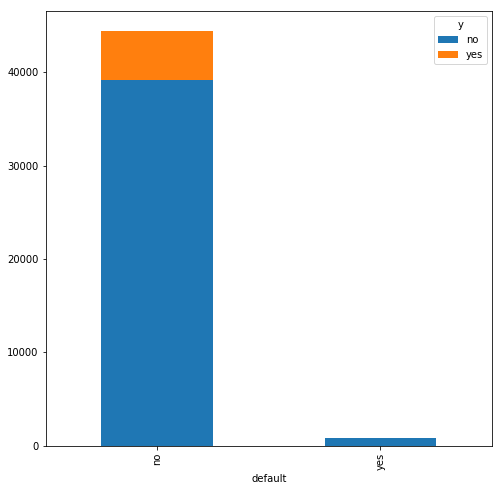

In [66]:
tab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [44]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [45]:
tab = pd.crosstab(data['contact'],data['y'])

In [46]:
tab

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


In [47]:
Observed_Values = tab.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[24916  4369]
 [ 2516   390]
 [12490   530]]


In [48]:
import scipy.stats
b=scipy.stats.chi2_contingency(tab)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[25859.09999779  3425.90000221]
 [ 2566.04215788   339.95784212]
 [11496.85784433  1523.14215567]]


In [53]:
b

(1035.714225356292,
 1.251738325340638e-225,
 2,
 array([[25859.09999779,  3425.90000221],
        [ 2566.04215788,   339.95784212],
        [11496.85784433,  1523.14215567]]))

In [54]:
no_of_rows=len(tab.iloc[0:4,0])
no_of_columns=len(tab.iloc[0,0:2])
df2=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

Degree of Freedom:- 1


In [56]:
df2=b[2]
df2

2

In [75]:
alpha=0.1
Expected_Values

array([[25859.09999779,  3425.90000221],
       [ 2566.04215788,   339.95784212],
       [11496.85784433,  1523.14215567]])

In [76]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 1035.7142253562922


In [77]:
chi_square

array([121.16282626, 914.5513991 ])

In [78]:
df2 

2

In [79]:
critical_value=chi2.ppf(q=1-alpha,df=df2)
print('critical_value:',critical_value)

critical_value: 4.605170185988092


In [80]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=2)
print('p-value:',p_value)

p-value: 0.0


In [78]:
df2

2

In [81]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df2)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.1
Degree of Freedom:  2
chi-square statistic: 1035.7142253562922
critical_value: 4.605170185988092
p-value: 0.0


In [83]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


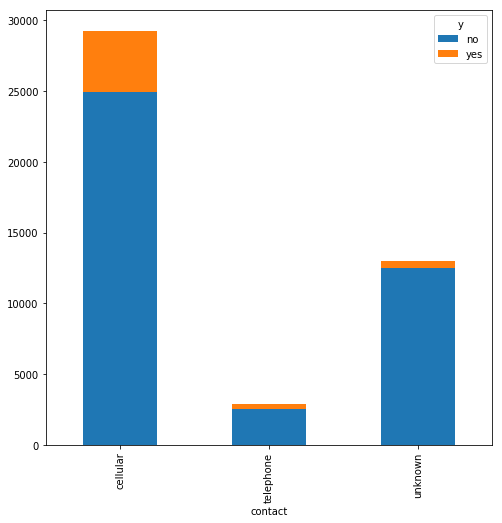

In [81]:
tab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [82]:
def test_dependency(data,f1,f2,alpha):
    tab = pd.crosstab(data[f1],data[f2])
    
    Observed_Values = tab.values
    
    b=scipy.stats.chi2_contingency(tab)
    Expected_Values = b[3]
    
    no_of_rows=len(tab.iloc[0:2,0])
    no_of_columns=len(tab.iloc[0,0:2])
    df=(no_of_rows-1)*(no_of_columns-1)
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    
    critical_value=chi2.ppf(q=1-alpha,df=df)
    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
    
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',df)
    print('chi-square statistic:',chi_square_statistic)
    print('critical_value:',critical_value)
    print('p-value:',p_value)
    
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")


  


In [83]:
test_dependency(data,'education','y',0.005)

Significance level:  0.005
Degree of Freedom:  1
chi-square statistic: 238.92350616407606
critical_value: 7.879438576622417
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [84]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Computing COrrelataion Co-effcient ( Numerical vs Numerical )

In [84]:
data.shape

(45211, 17)

Converting class to a numeric attribute

In [85]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

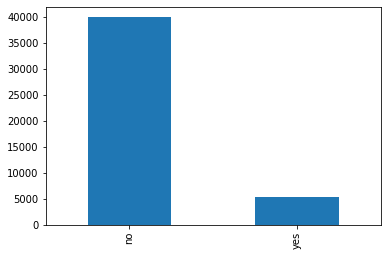

In [87]:
data['y'].value_counts().plot(kind='bar')

In [88]:
data['y']=data['y'].apply(lambda x: 0 if x == 'no' else 1)

In [89]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [90]:
# correlation of class variable y with all other attributes (numeric)
matrix = data.corr()
print(matrix['y'].sort_values(ascending=False))

y           1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y, dtype: float64


### Correlation Heatmap

In [91]:
corr = data.corr()
corr.style.background_gradient(cmap='BrBG')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,age,balance,day,duration,campaign,pdays,previous,y
age,1,0.0977827,-0.00912005,-0.00464843,0.00476031,-0.023758,0.00128832,0.025155
balance,0.0977827,1,0.00450259,0.0215604,-0.0145783,0.00343532,0.0166736,0.0528384
day,-0.00912005,0.00450259,1,-0.0302063,0.16249,-0.0930441,-0.0517105,-0.0283478
duration,-0.00464843,0.0215604,-0.0302063,1,-0.0845695,-0.00156477,0.00120306,0.394521
campaign,0.00476031,-0.0145783,0.16249,-0.0845695,1,-0.0886277,-0.0328553,-0.073172
pdays,-0.023758,0.00343532,-0.0930441,-0.00156477,-0.0886277,1,0.45482,0.103621
previous,0.00128832,0.0166736,-0.0517105,0.00120306,-0.0328553,0.45482,1,0.0932358
y,0.025155,0.0528384,-0.0283478,0.394521,-0.073172,0.103621,0.0932358,1


In [92]:
tab = pd.crosstab(data['duration'],data['y'])

In [93]:
tab

y,0,1
duration,,
0,3,0
1,2,0
2,3,0
3,4,0
4,15,0
5,35,0
6,45,0
7,73,0
8,84,1


Observation: Highest frequency is of married

In [94]:
data['default']=data['default'].apply(lambda x: 0 if x == 'no'else 1)

In [95]:
data['default'].value_counts()

0    44396
1      815
Name: default, dtype: int64

In [96]:
corr_matrix = data.corr()
print(corr_matrix["default"].sort_values(ascending=False))

default     1.000000
campaign    0.016822
day         0.009424
duration   -0.010021
age        -0.017879
previous   -0.018329
y          -0.022419
pdays      -0.029979
balance    -0.066745
Name: default, dtype: float64


In [97]:
corr_matrix = data.corr()
corr.style.background_gradient(cmap='BrBG')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,age,balance,day,duration,campaign,pdays,previous,y
age,1,0.0977827,-0.00912005,-0.00464843,0.00476031,-0.023758,0.00128832,0.025155
balance,0.0977827,1,0.00450259,0.0215604,-0.0145783,0.00343532,0.0166736,0.0528384
day,-0.00912005,0.00450259,1,-0.0302063,0.16249,-0.0930441,-0.0517105,-0.0283478
duration,-0.00464843,0.0215604,-0.0302063,1,-0.0845695,-0.00156477,0.00120306,0.394521
campaign,0.00476031,-0.0145783,0.16249,-0.0845695,1,-0.0886277,-0.0328553,-0.073172
pdays,-0.023758,0.00343532,-0.0930441,-0.00156477,-0.0886277,1,0.45482,0.103621
previous,0.00128832,0.0166736,-0.0517105,0.00120306,-0.0328553,0.45482,1,0.0932358
y,0.025155,0.0528384,-0.0283478,0.394521,-0.073172,0.103621,0.0932358,1


#### Correlation between Categorical-Numerical